In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
np.warnings.filterwarnings('ignore')
import datetime
import os


In [3]:
import excursion

import excursion.testcases.oned_fast as scandetails
import excursion.optimize

from excursion.utils import point_entropy, mesh2points, points2mesh, values2mesh



import excursion.plotting.onedim as plots
import excursion.utils as utils

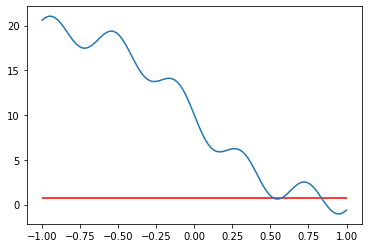

In [4]:

for func in scandetails.truth_functions:
    plt.plot(scandetails.plotX.ravel(),func(scandetails.plotX).ravel())
    
for thr in scandetails.thresholds:
    plt.hlines(thr, np.min(scandetails.plotX),np.max(scandetails.plotX), colors = 'red')


In [5]:
def plot_and_save(workdir, index, *args):
    fig, axarr = plt.subplots(1, 2)
    fig.set_size_inches(9.5, 3.5)
    plots.plot(axarr,gps,X,y_list,scandetails)
    plt.tight_layout()
    plt.savefig(os.path.join(workdir,'update_{}.png'.format(str(index).zfill(3))), bbox_inches = 'tight')
    plt.show()

In [6]:
#initialize it...
N_INIT  = 2
N_FUNCS = 1

np.random.seed(1)
X = np.random.uniform(scandetails.plot_rangedef[:,0],scandetails.plot_rangedef[:,1], size = (N_INIT,scandetails.ndims))
y_list = [np.array([scandetails.truth_functions[i](np.asarray([x]))[0] for x in X]) for i in range(N_FUNCS)]

mll -7.408346958878221
10.1**2 * RBF(length_scale=0.411)


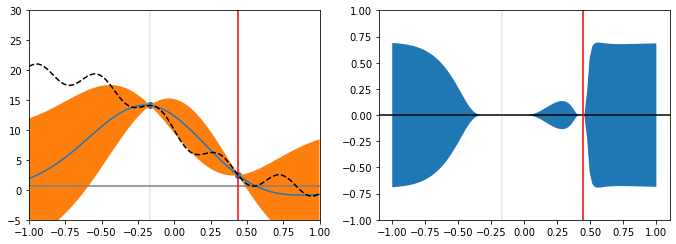

info_gain
taking new x. best non-existent index 0 [0.71717172]
Iteration 0. new x: [0.71717172]
Iteration 0. Evaluted function 0 to values: [[2.53218505]]
mll -10.180517204408913
8.98**2 * RBF(length_scale=0.427)


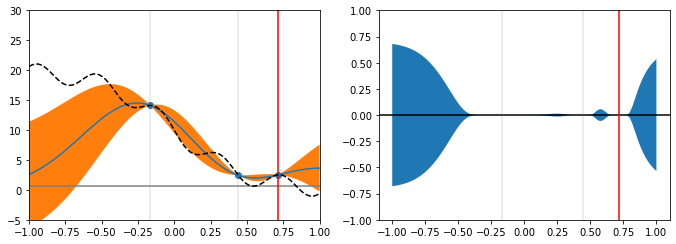

info_gain
taking new x. best non-existent index 0 [-0.81818182]
Iteration 1. new x: [-0.81818182]
Iteration 1. Evaluted function 0 to values: [[18.83546276]]
mll -13.51290296598904
11.7**2 * RBF(length_scale=0.684)


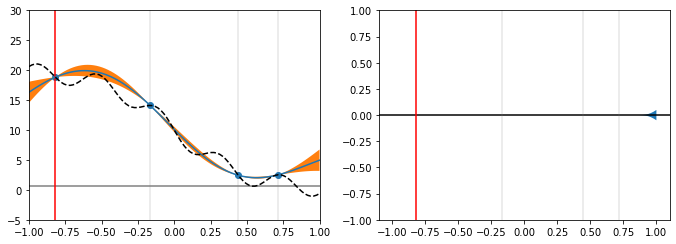

info_gain
taking new x. best non-existent index 0 [0.97979798]
Iteration 2. new x: [0.97979798]
Iteration 2. Evaluted function 0 to values: [[-0.88162968]]
mll -17.05572492697772
11.4**2 * RBF(length_scale=0.492)


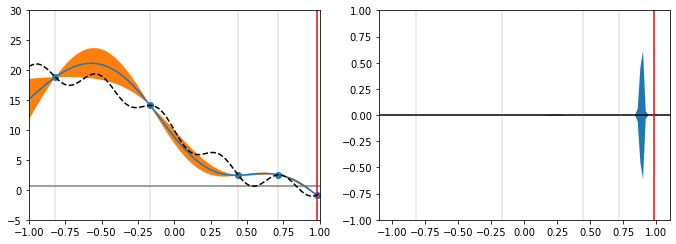

info_gain
taking new x. best non-existent index 0 [0.87878788]
Iteration 3. new x: [0.87878788]
Iteration 3. Evaluted function 0 to values: [[-0.28830233]]
mll -19.33894825755872
10.8**2 * RBF(length_scale=0.324)


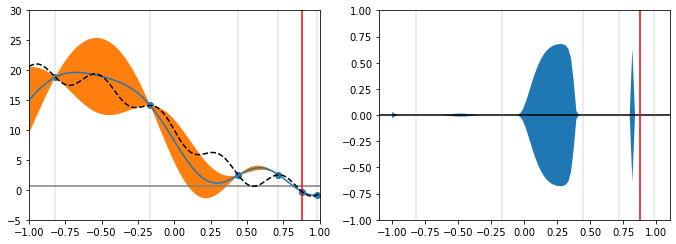

info_gain
taking new x. best non-existent index 0 [0.23232323]
Iteration 4. new x: [0.23232323]
Iteration 4. Evaluted function 0 to values: [[6.16619587]]
mll -22.251256881920014
10.3**2 * RBF(length_scale=0.293)


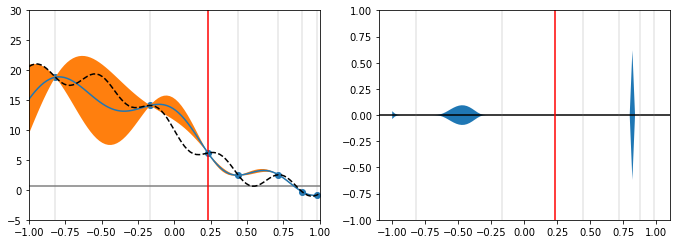

info_gain
taking new x. best non-existent index 0 [-0.47474747]
Iteration 5. new x: [-0.47474747]
Iteration 5. Evaluted function 0 to values: [[18.51053015]]
mll -25.256516077835364
10**2 * RBF(length_scale=0.296)


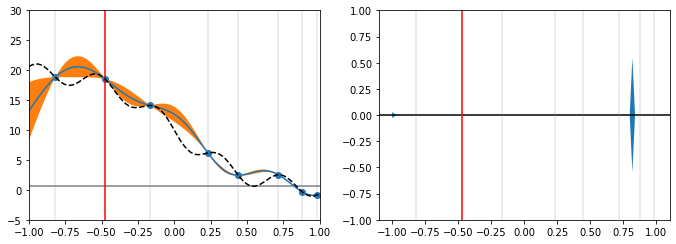

info_gain
taking new x. best non-existent index 0 [0.81818182]
Iteration 6. new x: [0.81818182]
Iteration 6. Evaluted function 0 to values: [[1.16453724]]
mll -27.744131311239954
10.3**2 * RBF(length_scale=0.221)


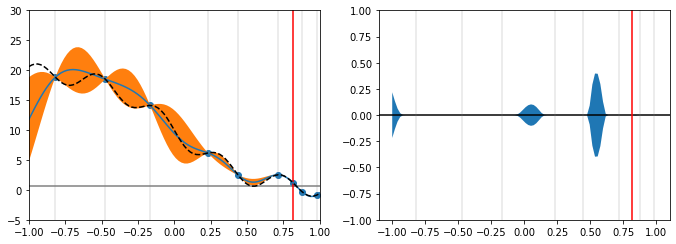

info_gain
taking new x. best non-existent index 0 [0.51515152]
Iteration 7. new x: [0.51515152]
Iteration 7. Evaluted function 0 to values: [[0.77172679]]
mll -28.67947600799768
10.2**2 * RBF(length_scale=0.216)


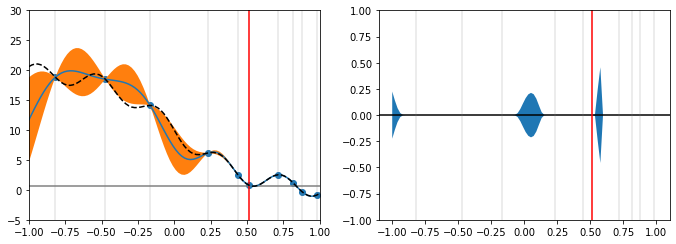

info_gain
taking new x. best non-existent index 0 [0.11111111]
Iteration 8. new x: [0.11111111]
Iteration 8. Evaluted function 0 to values: [[6.32053723]]
mll -30.501109376244372
9.77**2 * RBF(length_scale=0.214)


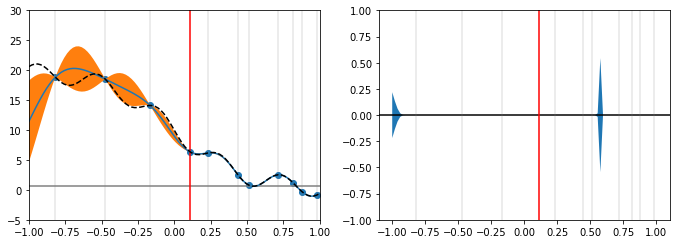

info_gain
taking new x. best non-existent index 0 [0.57575758]
Iteration 9. new x: [0.57575758]
Iteration 9. Evaluted function 0 to values: [[0.7535916]]


In [7]:
N_UPDATES = 10

workdir = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S-2dmulti')
os.mkdir(workdir)
for index in range(N_UPDATES):
    gps = [excursion.get_gp(X,y_list[i]) for i in range(N_FUNCS)]
    print(gps[0].kernel_)
    
    plot_and_save(workdir, index, gps,X,y_list,scandetails)    
    
    newx, acqvals = excursion.optimize.gridsearch(gps, X, scandetails)
    np.save('acq_'+str(index)+'.dat',acqvals)

    
    print('Iteration {}. new x: {}'.format(index, newx))
    newys_list = [scandetails.truth_functions[i](np.asarray([newx])) for i in range(N_FUNCS)]
    for i,newys in enumerate(newys_list):
        print('Iteration {}. Evaluted function {} to values: {}'.format(index, i,newys))
        y_list[i] = np.concatenate([y_list[i],newys])
    X = np.concatenate([X,np.array([newx])])

In [8]:
x_candidate = [-0.25]
from excursion.optimize import core
thresholds = [-np.inf] + scandetails.thresholds + [np.inf]
print('thresholds ', thresholds)
acqval = core.info_gain(x_candidate, gps, thresholds, scandetails.meanX) 
print('acqval(x_candidate) ', acqval)

thresholds  [-inf, 0.7, inf]
acqval(x_candidate)  -0.000560721239649119
